## 패키지 불러오기

In [37]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

## 파일 로드 및 확인

In [16]:
# 파일 경로
file_path = '/content/cmm_data.csv'

# 데이터 불러오기
data = pd.read_csv(file_path, encoding='cp949')

In [17]:
# 결측치 및 데이터 타입 확인
missing_values = data.isnull().sum()
data_types = data.dtypes

missing_values, data_types

(파일명                                    0
 평면1,평면도                                0
 원1(I) <상>,D                            0
 원2(I) <중>,D                            0
 원3(I) <하>,D                            0
                                       ..
 점30 <- 점18의 되부름 <소재원점>,Y               0
 직선25 <- 직선18의 되부름,X/Y                  0
 직선26 <- 직선16의 되부름,X/Y                  0
 거리4 <- XAXIS[평균]:점32와 점31 <소재기준>,DS    0
 품질상태                                   0
 Length: 67, dtype: int64,
 파일명                                     object
 평면1,평면도                                float64
 원1(I) <상>,D                            float64
 원2(I) <중>,D                            float64
 원3(I) <하>,D                            float64
                                         ...   
 점30 <- 점18의 되부름 <소재원점>,Y               float64
 직선25 <- 직선18의 되부름,X/Y                  float64
 직선26 <- 직선16의 되부름,X/Y                  float64
 거리4 <- XAXIS[평균]:점32와 점31 <소재기준>,DS    float64
 품질상태                          

In [18]:
# '파일명' 열 제외
data_numeric = data.drop(columns=['파일명'])

# 결측치를 평균값으로 대체
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_numeric)

# 데이터프레임으로 변환
data_imputed = pd.DataFrame(data_imputed, columns=data_numeric.columns)

In [19]:
# 독립 변수와 종속 변수 분리
X = data_imputed.drop(columns=['품질상태'])
y = data_imputed['품질상태']

## 여러 모델 학습(KNN)

### KNN(K-Nearest Neighbors)



In [20]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# 특성 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# KNN 모델 생성 및 훈련
k_values = range(1, 21)
train_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_scores.append(train_accuracy)

    test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_scores.append(test_accuracy)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


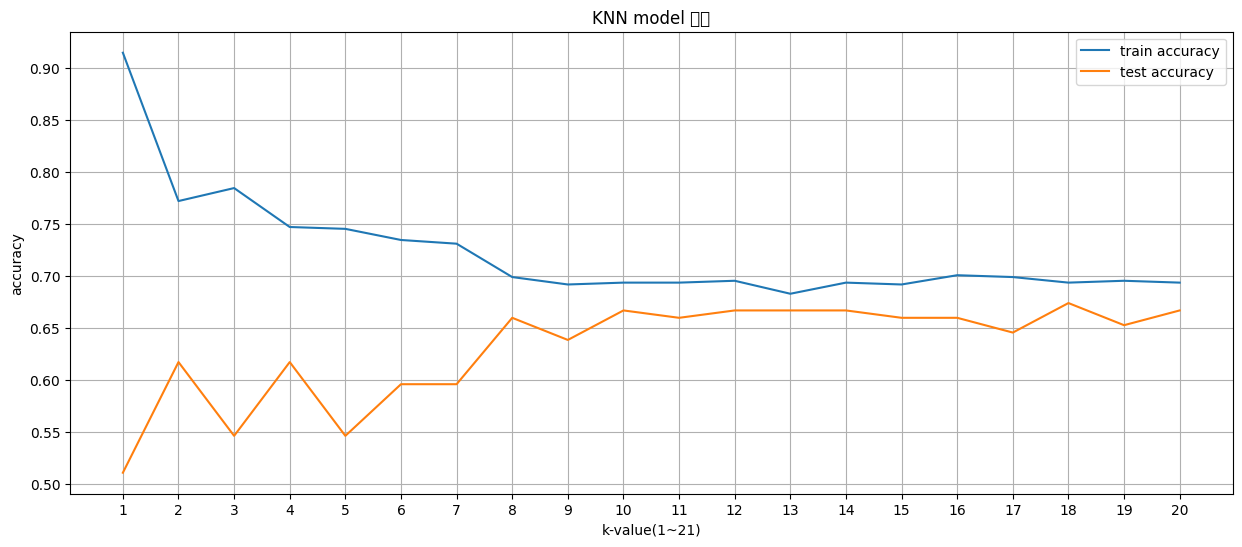

In [29]:
# 진행 상황 시각화
plt.figure(figsize=(15, 6))
plt.plot(k_values, train_scores, label='train accuracy')
plt.plot(k_values, test_scores, label='test accuracy')
plt.xlabel('k-value(1~21)')
plt.ylabel('accuracy')
plt.title('KNN model 성능')
plt.legend()
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [31]:
# 테스트 정확도 기반 최적의 k 값 선택
best_k = k_values[np.argmax(test_scores)]
print(f"Best k: {best_k}")

Best k: 18


최적의 k

In [32]:
# 최적의 k 값으로 최종 KNN 모델 훈련
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

예측

In [33]:
# 테스트 세트에서 예측
y_pred = final_knn.predict(X_test)

평가

In [34]:
# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"정확도: {accuracy:.2f}")
print("\n")
print("분류 보고서:")
print(classification_report(y_test, y_pred))

정확도: 0.67


분류 보고서:
              precision    recall  f1-score   support

         0.0       0.68      0.98      0.80        95
         1.0       0.50      0.04      0.08        46

    accuracy                           0.67       141
   macro avg       0.59      0.51      0.44       141
weighted avg       0.62      0.67      0.57       141



혼동 행렬:
[[93  2]
 [44  2]]


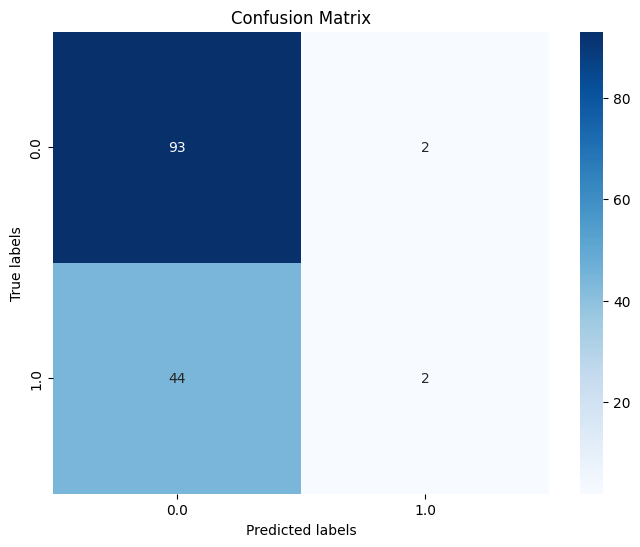

In [38]:
# 혼동 행렬
print("혼동 행렬:")
print(confusion_matrix(y_test, y_pred))


# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 클래스의 이름 (예를 들어, 0부터 9까지의 클래스 이름) 설정
classes = np.unique(y_test)

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()